In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [89]:
# Define the directory where the training data is stored
train_dir = './dataset/valid_images'


# Set up ImageDataGenerator with preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)

# Load the data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Ensure this points to the folder containing the class subfolders
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',  # Multi-class classification
    shuffle=True
)

# Check the class indices
print(train_generator.class_indices)
print(f'Total number of classes: {len(train_generator.class_indices)}')


Found 16923 images belonging to 28 classes.
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'space': 27}
Total number of classes: 28


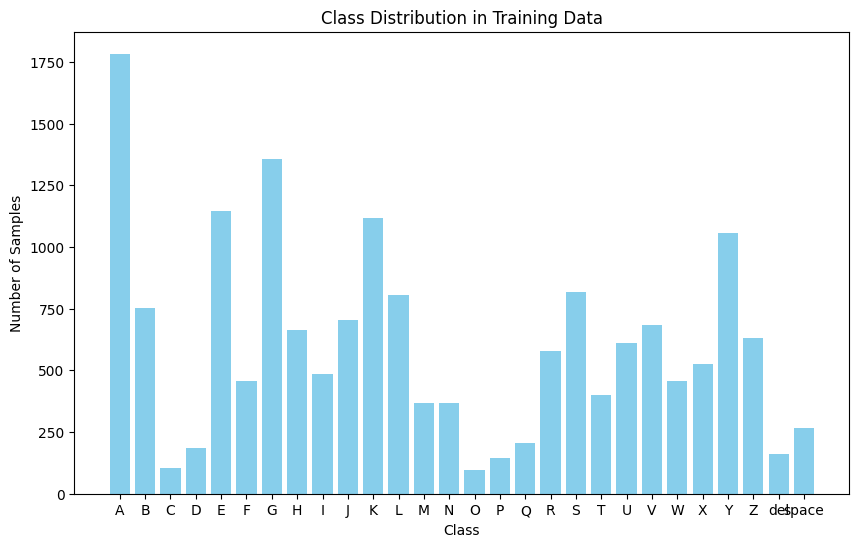

In [90]:
import numpy as np

# Get the class distribution
class_labels = list(train_generator.class_indices.keys())
class_counts = train_generator.classes

# Count the number of samples per class
unique, counts = np.unique(class_counts, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')
plt.show()

In [91]:
# Define a threshold for smaller classes
threshold = 200

# Filter the classes with fewer samples than the threshold
smaller_classes = {label: count for label, count in class_distribution.items() if count < threshold}

# Print the smaller classes and their populations
print("Smaller classes and their populations:")
for label, count in smaller_classes.items():
    print(f"Class {class_labels[label]}: {count} samples")

Smaller classes and their populations:
Class C: 105 samples
Class D: 187 samples
Class O: 95 samples
Class P: 143 samples
Class del: 159 samples


In [92]:
import pandas as pd

# Load the CSV file
csv_file_path = './hand_landmarks.csv'
df = pd.read_csv(csv_file_path)
df.head()

,image_name,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,./valid_images/E/image_4.png,0.629068,0.579493,-1.019287e-06,0.539822,0.609689,-0.038831,0.450803,0.577145,-0.064941,...,-0.101656,0.635381,0.355339,-0.147086,0.634476,0.429356,-0.135775,0.634959,0.488892,-0.114629
1,./valid_images/B/image_11.png,0.508154,0.776248,4.387611e-07,0.563160,0.755103,-0.032141,0.603299,0.712690,-0.048333,...,-0.044793,0.473296,0.586958,-0.062695,0.474958,0.550009,-0.070683,0.476986,0.519660,-0.074142
2,./valid_images/G/image_17.png,0.544147,0.741771,-3.255501e-08,0.570699,0.638477,-0.057236,0.539859,0.524279,-0.088770,...,-0.055774,0.226779,0.649414,-0.112793,0.296491,0.672369,-0.107086,0.359216,0.707058,-0.086362
3,./valid_images/H/image_26.png,0.578753,0.694237,1.839343e-07,0.590598,0.644780,-0.029077,0.573660,0.589687,-0.048334,...,-0.053113,0.454854,0.694040,-0.093493,0.504432,0.707260,-0.086305,0.543062,0.721972,-0.070569
4,./valid_images/U/image_31.png,0.344170,0.494072,5.511806e-07,0.388354,0.446512,-0.028733,0.403758,0.381649,-0.040827,...,-0.015420,0.262299,0.355560,-0.042387,0.289443,0.381186,-0.036826,0.305765,0.415534,-0.024204


In [93]:
# Extract the label from the image_name column
df['label'] = df['image_name'].apply(lambda x: x.split('/')[-2])

# Display the first few rows to verify
df.head()

,image_name,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,z12,z13,z14,z15,z16,z17,z18,z19,z20,label
0,./valid_images/E/image_4.png,0.629068,0.579493,-1.019287e-06,0.539822,0.609689,-0.038831,0.450803,0.577145,-0.064941,...,0.635381,0.355339,-0.147086,0.634476,0.429356,-0.135775,0.634959,0.488892,-0.114629,E
1,./valid_images/B/image_11.png,0.508154,0.776248,4.387611e-07,0.563160,0.755103,-0.032141,0.603299,0.712690,-0.048333,...,0.473296,0.586958,-0.062695,0.474958,0.550009,-0.070683,0.476986,0.519660,-0.074142,B
2,./valid_images/G/image_17.png,0.544147,0.741771,-3.255501e-08,0.570699,0.638477,-0.057236,0.539859,0.524279,-0.088770,...,0.226779,0.649414,-0.112793,0.296491,0.672369,-0.107086,0.359216,0.707058,-0.086362,G
3,./valid_images/H/image_26.png,0.578753,0.694237,1.839343e-07,0.590598,0.644780,-0.029077,0.573660,0.589687,-0.048334,...,0.454854,0.694040,-0.093493,0.504432,0.707260,-0.086305,0.543062,0.721972,-0.070569,H
4,./valid_images/U/image_31.png,0.344170,0.494072,5.511806e-07,0.388354,0.446512,-0.028733,0.403758,0.381649,-0.040827,...,0.262299,0.355560,-0.042387,0.289443,0.381186,-0.036826,0.305765,0.415534,-0.024204,U


In [94]:
# Extract the ID from the image_name column
df['id'] = df['image_name'].apply(lambda x: int(x.split('/')[-1].split('.')[0].split('_')[-1]))

# Display the first few rows to verify
df.tail()

,image_name,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,z13,z14,z15,z16,z17,z18,z19,z20,label,id
16923,./valid_images/I/image_86968.png,0.646865,0.861053,-5.879685e-07,0.708275,0.831992,-0.040362,0.739587,0.773924,-0.062738,...,0.627735,-0.072268,0.515696,0.578932,-0.078334,0.505415,0.526809,-0.079031,I,86968
16924,./valid_images/H/image_86974.png,0.641056,0.631784,-1.623990e-08,0.652172,0.571498,-0.032860,0.616921,0.504443,-0.048042,...,0.594346,-0.073531,0.529399,0.607572,-0.069217,0.569605,0.621287,-0.055246,H,86974
16925,./valid_images/F/image_86975.png,0.532139,0.670146,6.195207e-07,0.590240,0.629223,-0.027943,0.637900,0.567476,-0.043605,...,0.468319,-0.071600,0.337562,0.429652,-0.085339,0.343921,0.396037,-0.092932,F,86975
16926,./valid_images/H/image_86982.png,0.602382,0.582058,9.962977e-07,0.618448,0.524917,-0.043027,0.581555,0.470647,-0.067424,...,0.563390,-0.128030,0.503262,0.577047,-0.116311,0.546889,0.594138,-0.093220,H,86982
16927,./valid_images/N/image_86996.png,0.700166,0.191857,3.386668e-07,0.773860,0.205155,-0.042151,0.821195,0.213219,-0.081338,...,0.244679,-0.158625,0.648132,0.289683,-0.153986,0.661939,0.312924,-0.148190,N,86996


In [95]:
# Drop the image_name column
df.drop(columns=['image_name'], inplace=True)

# Reorder the columns to bring 'id' and 'label' to the front
cols = ['id', 'label'] + [col for col in df.columns if col not in ['id', 'label']]
df = df[cols]

# Display the first few rows to verify
df.head()

,id,label,x0,x1,x2,x3,x4,x5,x6,x7,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,4,E,0.629068,0.579493,-1.019287e-06,0.539822,0.609689,-0.038831,0.450803,0.577145,...,-0.101656,0.635381,0.355339,-0.147086,0.634476,0.429356,-0.135775,0.634959,0.488892,-0.114629
1,11,B,0.508154,0.776248,4.387611e-07,0.563160,0.755103,-0.032141,0.603299,0.712690,...,-0.044793,0.473296,0.586958,-0.062695,0.474958,0.550009,-0.070683,0.476986,0.519660,-0.074142
2,17,G,0.544147,0.741771,-3.255501e-08,0.570699,0.638477,-0.057236,0.539859,0.524279,...,-0.055774,0.226779,0.649414,-0.112793,0.296491,0.672369,-0.107086,0.359216,0.707058,-0.086362
3,26,H,0.578753,0.694237,1.839343e-07,0.590598,0.644780,-0.029077,0.573660,0.589687,...,-0.053113,0.454854,0.694040,-0.093493,0.504432,0.707260,-0.086305,0.543062,0.721972,-0.070569
4,31,U,0.344170,0.494072,5.511806e-07,0.388354,0.446512,-0.028733,0.403758,0.381649,...,-0.015420,0.262299,0.355560,-0.042387,0.289443,0.381186,-0.036826,0.305765,0.415534,-0.024204


In [72]:
# Group by 'label' and sample up to 100 instances per group
df_balanced = df.groupby('label').apply(lambda x: x.sample(min(len(x), 100))).reset_index(drop=True)

# Display the first few rows to verify
df_balanced.head()

C:\Users\alext\AppData\Local\Temp\ipykernel_8472\2709995759.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('label').apply(lambda x: x.sample(min(len(x), 100))).reset_index(drop=True)


,id,label,x0,x1,x2,x3,x4,x5,x6,x7,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,62688,A,0.496540,0.555244,-4.203135e-07,0.591218,0.505008,-0.032473,0.655362,0.392192,...,-0.036288,0.398171,0.338193,-0.079192,0.416156,0.403648,-0.070012,0.427094,0.455870,-0.050542
1,84919,A,0.596002,0.655390,-5.044207e-07,0.690936,0.595866,-0.044238,0.759031,0.467914,...,-0.033565,0.502833,0.406300,-0.084145,0.523343,0.489545,-0.074309,0.533440,0.552559,-0.050473
2,82980,A,0.464231,0.855776,-7.761017e-07,0.557073,0.814030,-0.031521,0.618627,0.728535,...,-0.024986,0.404138,0.626896,-0.049595,0.420880,0.689522,-0.034814,0.423258,0.738388,-0.015640
3,63962,A,0.589690,0.496896,-5.226327e-07,0.685553,0.472816,-0.042203,0.787470,0.379565,...,-0.033135,0.528492,0.257444,-0.073790,0.535568,0.326578,-0.063518,0.538673,0.380902,-0.042422
4,25166,A,0.528217,0.786051,-4.875091e-07,0.597609,0.735185,-0.029616,0.647569,0.639878,...,-0.019463,0.430974,0.613658,-0.057712,0.448818,0.670942,-0.050626,0.464244,0.716782,-0.032963


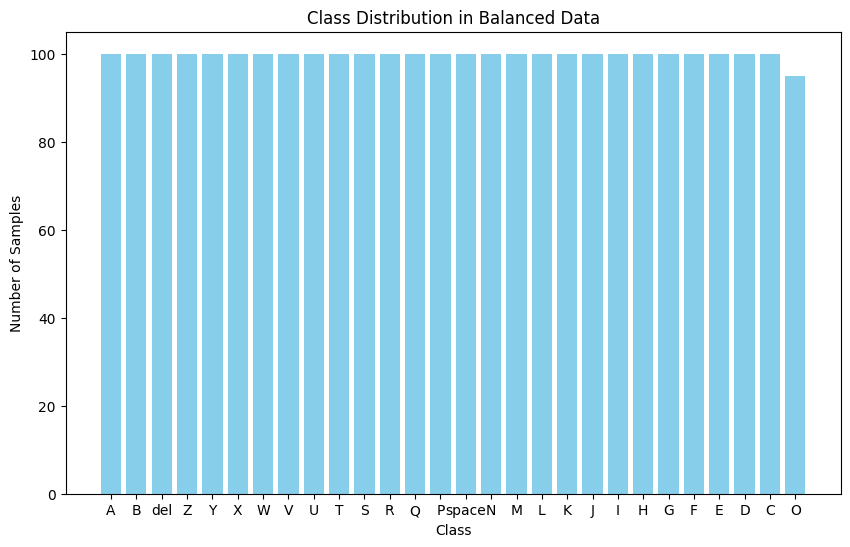

In [96]:
# Get the class distribution for the balanced set
balanced_class_distribution = df_balanced['label'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(balanced_class_distribution.index, balanced_class_distribution.values, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Balanced Data')
plt.show()

In [98]:
# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')

Training set shape: (13542, 64), (13542,)
Validation set shape: (3386, 64), (3386,)


In [99]:
# Convert string labels to integer labels
label_to_index = {label: index for index, label in enumerate(class_labels)}
y_train_int = y_train.map(label_to_index)
y_val_int = y_val.map(label_to_index)


In [100]:
# Display the first few rows of the training set
print("Training set:")
print(X_train.head())
print(y_train_int.head())

# Display the first few rows of the validation set
print("\nValidation set:")
print(X_val.head())
print(y_val_int.head())

Training set:
          id        x0        x1            x2        x3        x4        x5  \
12301  63360  0.300153  0.607531 -2.589049e-07  0.304215  0.544108 -0.025588   
13362  68870  0.467436  0.441550  1.179586e-07  0.522404  0.443473 -0.031097   
14405  74327  0.437666  0.329834 -4.534514e-07  0.422635  0.381640 -0.018800   
5382   27960  0.514603  0.793853  4.512395e-07  0.577999  0.761419 -0.034965   
10510  53963  0.779488  0.607446 -3.584739e-07  0.866237  0.563191 -0.030999   

             x6        x7        x8  ...       z11       z12       z13  \
12301  0.266202  0.493480 -0.036099  ...  0.000359  0.149519  0.548216   
13362  0.595982  0.411732 -0.047491  ... -0.036845  0.436802  0.217781   
14405  0.407828  0.432573 -0.048600  ... -0.118785  0.436810  0.439223   
5382   0.618871  0.712338 -0.051202  ... -0.034029  0.468304  0.587145   
10510  0.943963  0.484056 -0.046628  ... -0.037404  0.721889  0.365735   

            z14       z15       z16       z17       z18     

In [101]:
print("Training set features (first 5 rows):")
print(X_train.head())
print("\nTraining set labels (first 5 rows):")
print(y_train_int.head())

print("\nValidation set features (first 5 rows):")
print(X_val.head())
print("\nValidation set labels (first 5 rows):")
print(y_val_int.head())

Training set features (first 5 rows):
          id        x0        x1            x2        x3        x4        x5  \
12301  63360  0.300153  0.607531 -2.589049e-07  0.304215  0.544108 -0.025588   
13362  68870  0.467436  0.441550  1.179586e-07  0.522404  0.443473 -0.031097   
14405  74327  0.437666  0.329834 -4.534514e-07  0.422635  0.381640 -0.018800   
5382   27960  0.514603  0.793853  4.512395e-07  0.577999  0.761419 -0.034965   
10510  53963  0.779488  0.607446 -3.584739e-07  0.866237  0.563191 -0.030999   

             x6        x7        x8  ...       z11       z12       z13  \
12301  0.266202  0.493480 -0.036099  ...  0.000359  0.149519  0.548216   
13362  0.595982  0.411732 -0.047491  ... -0.036845  0.436802  0.217781   
14405  0.407828  0.432573 -0.048600  ... -0.118785  0.436810  0.439223   
5382   0.618871  0.712338 -0.051202  ... -0.034029  0.468304  0.587145   
10510  0.943963  0.484056 -0.046628  ... -0.037404  0.721889  0.365735   

            z14       z15       z16 

In [106]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_int), y=y_train_int)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


In [104]:
# Drop the 'id' column from the training and validation sets
X_train = X_train.drop(columns=['id'])
X_val = X_val.drop(columns=['id'])

# Display the first few rows to verify
print("Training set features (first 5 rows) after dropping 'id':")
print(X_train.head())

print("\nValidation set features (first 5 rows) after dropping 'id':")
print(X_val.head())

KeyError: "['id'] not found in axis"

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(len(class_labels), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-5)

# Train the model
history = model.fit(X_train, y_train_int, epochs=100, validation_data=(X_val, y_val_int),
                    batch_size=64, class_weight=class_weights_dict, callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val_int)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')


Epoch 1/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.1531 - loss: 3.2524 - val_accuracy: 0.2191 - val_loss: 2.8623 - learning_rate: 0.0010
Epoch 2/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5308 - loss: 1.5287 - val_accuracy: 0.5431 - val_loss: 1.7400 - learning_rate: 0.0010
Epoch 3/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6687 - loss: 1.0742 - val_accuracy: 0.6515 - val_loss: 1.0948 - learning_rate: 0.0010
Epoch 4/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7095 - loss: 0.9266 - val_accuracy: 0.7017 - val_loss: 0.9146 - learning_rate: 0.0010
Epoch 5/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7344 - loss: 0.8606 - val_accuracy: 0.7351 - val_loss: 0.8093 - learning_rate: 0.0010
Epoch 6/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7558 - loss: 0.8202 - val_accuracy: 0.8160 - val_loss: 0.6280 - learning_rate: 0.0010
Epoch 7/100
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7659 - loss: 

In [110]:
# Save the model to a file
model.save('trained_model.h5')